## Teste NeuPy com o dataset Iris

Loading modules

In [9]:
%matplotlib inline
from matplotlib import pyplot
import numpy as np
import random

from neupy import environment, algorithms, layers, plots
from neupy.exceptions import StopTraining

from sklearn import datasets, model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import theano


theano.config.floatX = 'float32'

environment.reproducible()

Loading **iris** dataset

In [10]:
iris = datasets.load_iris()
data, target = iris.data, iris.target

Normalizing the dataset

In [11]:
data = data / 255
data = data - data.mean(axis=0)

target_scaler = OneHotEncoder()
target = target_scaler.fit_transform(target.reshape((-1, 1)))
target = target.todense()

Separating the dataset into train and test

In [12]:
data_train, data_test, target_train, target_test = train_test_split(
    data,
    target,
    train_size=(6 / 7)
)

Creating the network

In [13]:
def on_epoch_end(net):
    if net.errors.last() < 0.01:
        raise StopTraining("Training has been interrupted")


net = algorithms.GradientDescent(
    [
        layers.Input(4),
        layers.Relu(500),
        layers.Softmax(3),
    ],
    verbose=True,
    show_epoch=50,
    epoch_end_signal=on_epoch_end,
)


Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal = on_epoch_end
[OPTION] show_epoch = 50
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 0.26 seconds


In [14]:
net.architecture()


Network's architecture

-----------------------------------------------
| # | Input shape | Layer Type | Output shape |
-----------------------------------------------
| 1 | 4           | Input      | 4            |
| 2 | 4           | Relu       | 500          |
| 3 | 500         | Softmax    | 3            |
-----------------------------------------------



Let's Train! :)

In [15]:
net.train(data_train, target_train, data_test, target_test, epochs=10000)


Start training

[TRAINING DATA] shapes: (128, 4)
[TEST DATA] shapes: (22, 4)
[TRAINING] Total epochs: 10000

------------------------------------------------
| Epoch # | Train err | Valid err | Time       |
------------------------------------------------
| 1       | 0.2222    | 0.222     | 1 ms       |
| 50      | 0.221     | 0.2234    | 1 ms       |
| 100     | 0.2209    | 0.2247    | 1 ms       |
| 150     | 0.2208    | 0.2255    | 1 ms       |
| 200     | 0.2208    | 0.226     | 1 ms       |
| 250     | 0.2208    | 0.2263    | 1 ms       |
| 300     | 0.2208    | 0.2265    | 1 ms       |
| 350     | 0.2208    | 0.2266    | 1 ms       |
| 400     | 0.2207    | 0.2267    | 1 ms       |
| 450     | 0.2207    | 0.2267    | 1 ms       |
| 500     | 0.2207    | 0.2268    | 1 ms       |
------------------------------------------------
| Too many outputs in the terminal. Set up     |
| logging after each 1250 epochs               |
------------------------------------------------
| 1250  

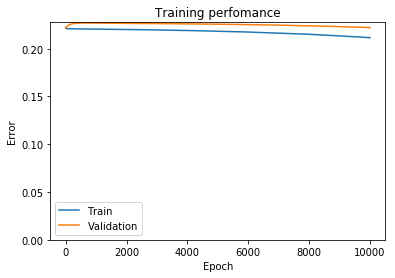

In [16]:
plots.error_plot(net)